In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/AI/Train'
test_dir = '/content/drive/MyDrive/AI/Test'

In [4]:
import os
print(len(os.listdir('/content/drive/MyDrive/AI/Train/Bears')))
print(len(os.listdir('/content/drive/MyDrive/AI/Train/Pandas')))
print(len(os.listdir('/content/drive/MyDrive/AI/Test/Bears')))
print(len(os.listdir('/content/drive/MyDrive/AI/Test/Pandas')))

250
250
50
50


In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Bears vs. Pandas)
    subset='training'
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [22]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [23]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [24]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
13/13 [==============================] - 68s 5s/step - loss: 0.4832 - accuracy: 0.8075 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 67s 5s/step - loss: 0.0519 - accuracy: 0.9900 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 3/30
13/13 [==============================] - 68s 5s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/30
13/13 [==============================] - 62s 5s/step - loss: 2.9594e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 63s 5s/step - loss: 8.0373e-05 - accuracy: 1.0000 - val_loss: 7.6588e-05 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 67s 5s/step - loss: 4.2401e-05 - accuracy: 1.0000 - val_loss: 2.3862e-04 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 63s 5s/step - loss: 2.6555e-05 - accuracy: 1.0000 - val_loss: 2.5825e-04 - val_accuracy:

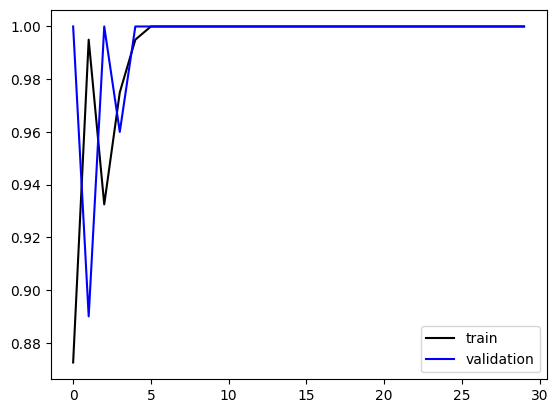

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='black',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

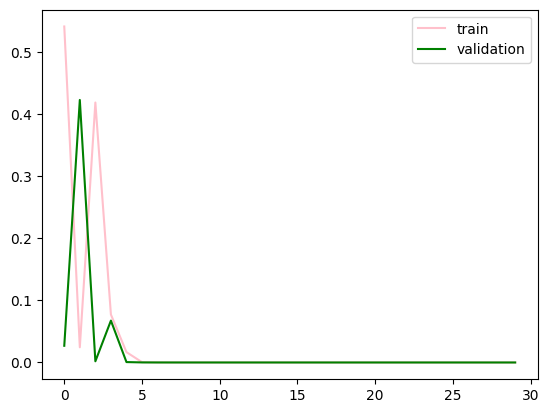

In [14]:
plt.plot(history.history['loss'],color='pink',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [18]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 24s 7s/step
[[1.4281608e-06]
 [8.0665046e-07]
 [1.3319617e-09]
 [9.9999976e-01]
 [1.0000000e+00]
 [3.0680829e-09]
 [1.0000000e+00]
 [7.2166749e-08]
 [1.0000000e+00]
 [2.9429866e-13]
 [1.0000000e+00]
 [1.0882066e-09]
 [1.0000000e+00]
 [9.9999994e-01]
 [5.1047794e-10]
 [9.9999988e-01]
 [1.0000000e+00]
 [1.2141467e-09]
 [2.9833400e-09]
 [1.5731935e-08]
 [5.5009450e-06]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.3342182e-08]
 [1.0000000e+00]
 [1.8232634e-11]
 [1.0000000e+00]
 [6.8551186e-11]
 [1.3978421e-09]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.8568597e-08]
 [7.1764128e-09]
 [1.0000000e+00]
 [7.8053529e-11]
 [8.2346817e-11]
 [1.0000000e+00]
 [1.3095156e-11]
 [5.3775073e-10]
 [6.6162886e-10]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.6257896e-07]
 [2.9405014e-09]
 [1.0000000e+00]
 [2.0871616e-12]
 [9.9999982e-01]
 [1.0000000e+00]
 [2.6455844e-09]
 [1.0000000e+00]
 [9.9999988e-01]
 [5.9837899e-09]
 [9.0249452e-09]
 [2.4200329e-1

In [19]:
len(predictions)

100

In [20]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[26 24]
 [24 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        50
           1       0.52      0.52      0.52        50

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.52      0.52      0.52       100

